# Eye Gaze Analysis and Visualization

This notebook loads **pre-processed eye tracking metrics** and performs statistical analysis and visualization.

**Prerequisites**: 
- Run `process_eye_data.py` first to generate processed metrics
- Install R and required packages for statistical analysis:
  - `lmerTest` (for mixed-effects modeling)
  - `emmeans` (for estimated marginal means and pairwise comparisons)

**Data Source**: Loads from `data/processed/combined/eyegaze_metrics_all.csv`

## 1. Import Libraries and Load Pre-Processed Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Processing Demonstration

Before analyzing the pre-processed metrics, let's visualize what the processing pipeline does by loading a random raw file and showing the normalization step:

In [18]:
# Import processing utilities to demonstrate the pipeline
from utils.config import CFG
from utils.eye_gaze_utils import load_file_data, normalize_gaze_to_screen, plot_data
import random

print("✓ Processing utilities imported")

✓ Processing utilities imported


Loading random file for demonstration: 3216_session02.csv
✓ Loaded 459652 samples
✓ Normalized gaze coordinates to screen dimensions (2560x1440)
Plotting data...


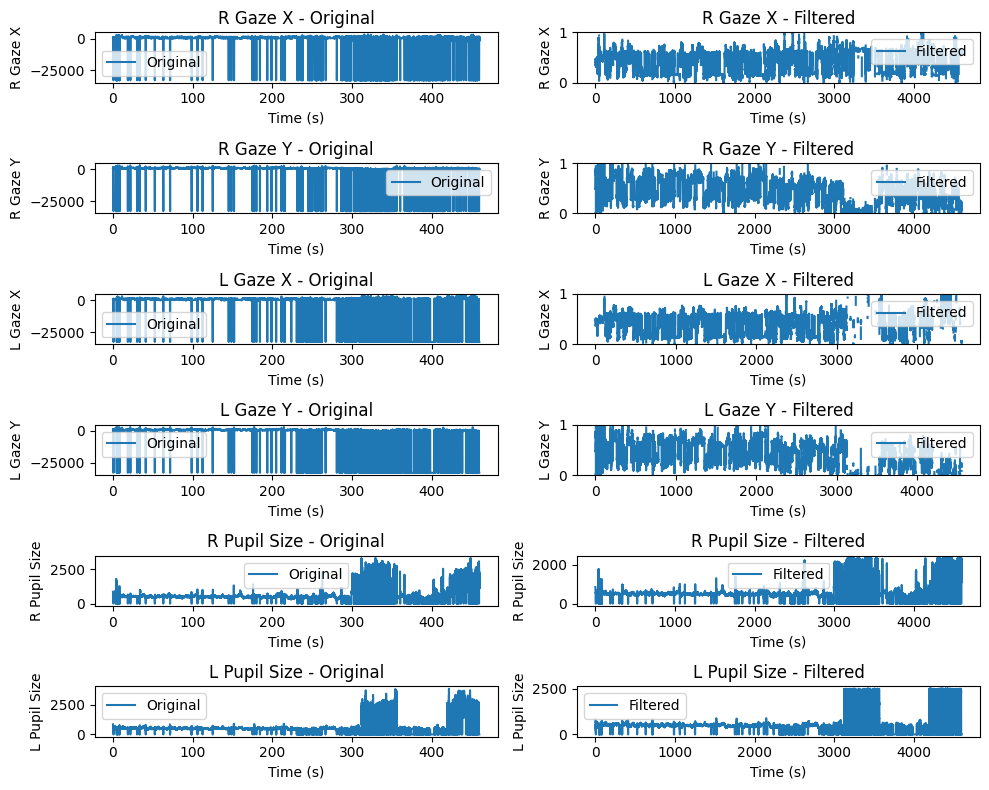

In [19]:
# Pick a random raw file to demonstrate processing
raw_dir = Path(CFG.RAW_DIR)
eye_files = sorted([f.name for f in raw_dir.glob("*.csv")])

if len(eye_files) > 0:
    # Pick a random file
    example_file = random.choice(eye_files)
    print(f"Loading random file for demonstration: {example_file}")
    
    # Load and normalize data
    file_data = load_file_data(str(raw_dir), example_file)
    
    if file_data is not None:
        original_df = file_data['data']
        filtered_df = normalize_gaze_to_screen(original_df.copy())
        print(f"✓ Loaded {len(original_df)} samples")
        print(f"✓ Normalized gaze coordinates to screen dimensions ({CFG.SCREEN_WIDTH}x{CFG.SCREEN_HEIGHT})")
        
        # Plot original versus normalized data
        columns_to_plot = ['R Gaze X', 'R Gaze Y', 'L Gaze X', 'L Gaze Y', 'R Pupil Size', 'L Pupil Size']
        plot_data(original_df, filtered_df, columns_to_plot, filename=example_file, dir=str(raw_dir), save=False)
    else:
        print(f"Failed to load {example_file}")
else:
    print("No raw files found in directory")

## 3. Load Pre-Processed Metrics

Load the combined eye tracking metrics file (generated by `process_eye_data.py`):

In [20]:
# Load combined metrics from processed data
metrics_file = Path('data/processed/combined/eyegaze_metrics_all.csv')

if not metrics_file.exists():
    raise FileNotFoundError(
        f"Processed metrics file not found: {metrics_file}\n"
        "Please run 'python process_eye_data.py' first to generate the metrics."
    )

all_metrics_df = pd.read_csv(metrics_file)

print(f"✓ Loaded {len(all_metrics_df)} windows from {all_metrics_df['participant'].nunique()} participants")
print(f"✓ Conditions: {sorted(all_metrics_df['condition'].unique())}")
print(f"✓ Windows per participant: {all_metrics_df.groupby('participant').size().describe()}")

✓ Loaded 1657 windows from 38 participants
✓ Conditions: ['H', 'L', 'M']
✓ Windows per participant: count    38.000000
mean     43.605263
std       3.560591
min      30.000000
25%      44.000000
50%      45.000000
75%      45.000000
max      45.000000
dtype: float64


## 4. Explore the Data

Display the first few rows and summary statistics:

In [21]:
# Display first few rows
print("First 10 rows of the dataset:")
display(all_metrics_df.head(10))

# Display summary statistics
print("\nSummary statistics:")
display(all_metrics_df.describe())

# Display data types and missing values
print("\nData info:")
print(f"Shape: {all_metrics_df.shape}")
print(f"Columns: {list(all_metrics_df.columns)}")
print(f"\nMissing values per column:")
print(all_metrics_df.isnull().sum())

First 10 rows of the dataset:


,participant,condition,window_index,start_time,end_time,pct_missing,mean_vel,max_vel,mean_acc,rms_disp,fix_count,fix_mean_dur,fix_rate,blink_count,blink_mean_dur,blink_rate,sac_count,sac_mean_dur,sac_rate
0,3210,H,0,0.000000,59.999093,6.273965,1.466415,352.473358,-0.019607,0.334568,89,0.295313,1.483356,47,0.098802,0.783345,1993,0.002506,33.217169
1,3210,H,1,30.000283,89.999068,6.114946,1.533596,155.573624,-0.129555,0.321309,79,0.344582,1.316693,41,0.106103,0.683347,2040,0.002499,34.000689
2,3210,H,2,60.000150,119.999442,4.652335,1.553413,155.573624,-0.063765,0.317369,77,0.388040,1.283348,42,0.083427,0.700008,2120,0.002515,35.333750
3,3210,H,3,90.000110,149.999066,6.199470,1.645957,274.432584,0.054740,0.341877,74,0.326724,1.233355,45,0.083387,0.750013,2150,0.002552,35.833957
4,3210,H,4,120.000483,179.999700,6.428833,1.576087,274.432584,-0.050333,0.348729,78,0.291639,1.300017,41,0.093848,0.683342,2071,0.002528,34.517117
5,3210,H,5,150.000109,209.999052,4.362445,1.662096,130.952381,0.018091,0.348172,78,0.300200,1.300023,38,0.087903,0.633344,2061,0.002543,34.350606
6,3210,H,6,180.000739,239.999779,4.929651,1.733964,202.734205,0.000960,0.347206,71,0.320796,1.183352,40,0.094244,0.666677,2160,0.002543,36.000576
7,3210,H,7,210.000121,269.999669,6.127174,1.656753,202.734205,-0.072909,0.343911,87,0.313282,1.450011,42,0.092433,0.700005,2100,0.002516,35.000264
8,3210,H,8,240.000823,299.999357,5.476638,1.713427,136.792052,0.092517,0.335104,94,0.317407,1.566705,42,0.085786,0.700017,1928,0.002516,32.134118
9,3210,H,9,270.000709,329.999648,4.889810,1.652288,241.143480,0.050799,0.331546,83,0.323249,1.383358,39,0.095953,0.650011,1937,0.002503,32.283904



Summary statistics:


,participant,window_index,start_time,end_time,pct_missing,mean_vel,max_vel,mean_acc,rms_disp,fix_count,fix_mean_dur,fix_rate,blink_count,blink_mean_dur,blink_rate,sac_count,sac_mean_dur,sac_rate
count,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000
mean,3231.633072,7.008449,210.253956,270.252941,8.347264,1.569964,311.462556,-0.002202,0.324735,80.036210,0.358930,1.333959,32.499698,0.118715,0.541671,2974.433917,0.002357,49.574739
std,11.022400,4.304523,129.135724,129.135673,5.735544,0.402034,193.705558,0.175616,0.019306,18.775495,0.053644,0.312930,22.809390,0.063404,0.380163,656.915266,0.000050,10.948781
min,3210.000000,0.000000,0.000000,59.998955,0.026076,0.911800,48.732151,-1.796736,0.244402,10.000000,0.224450,0.166669,2.000000,0.014105,0.033334,1513.000000,0.002269,25.216831
25%,3222.000000,3.000000,90.000801,149.999781,3.382183,1.321234,154.352434,-0.080421,0.313168,70.000000,0.321007,1.166698,18.000000,0.075932,0.300003,2500.000000,0.002320,41.667379
50%,3232.000000,7.000000,210.000528,269.999456,7.637875,1.473635,258.466071,-0.006545,0.325467,83.000000,0.352228,1.383345,27.000000,0.105196,0.450011,2902.000000,0.002348,48.367531
75%,3241.000000,11.000000,330.000238,389.999207,12.616733,1.686785,437.986946,0.071391,0.337930,93.000000,0.389387,1.550006,42.000000,0.144640,0.700002,3405.000000,0.002384,56.750548
max,3250.000000,14.000000,420.001040,479.999994,24.457940,4.236662,1088.332537,1.920988,0.390970,125.000000,0.646486,2.083382,329.000000,0.521914,5.483484,4937.000000,0.002597,82.284200



Data info:
Shape: (1657, 19)
Columns: ['participant', 'condition', 'window_index', 'start_time', 'end_time', 'pct_missing', 'mean_vel', 'max_vel', 'mean_acc', 'rms_disp', 'fix_count', 'fix_mean_dur', 'fix_rate', 'blink_count', 'blink_mean_dur', 'blink_rate', 'sac_count', 'sac_mean_dur', 'sac_rate']

Missing values per column:
participant       0
condition         0
window_index      0
start_time        0
end_time          0
                 ..
blink_mean_dur    0
blink_rate        0
sac_count         0
sac_mean_dur      0
sac_rate          0
Length: 19, dtype: int64


## 5. Condition-Level Summary Statistics

Compute mean and standard error for each metric by condition:

In [23]:
# Compute summary statistics by condition (using actual column names)
summary_stats = all_metrics_df.groupby('condition').agg({
    'blink_count': ['mean', 'std', 'sem'],
    'blink_rate': ['mean', 'std', 'sem'],
    'fix_count': ['mean', 'std', 'sem'],
    'fix_rate': ['mean', 'std', 'sem'],
    'sac_count': ['mean', 'std', 'sem'],
    'sac_rate': ['mean', 'std', 'sem'],
    'mean_vel': ['mean', 'std', 'sem'],
    'rms_disp': ['mean', 'std', 'sem']
}).round(3)

print("Summary Statistics by Condition:")
display(summary_stats)

# Also show counts by participant and condition
print("\nWindows per Participant and Condition:")
window_counts = all_metrics_df.groupby(['participant', 'condition']).size().unstack(fill_value=0)
display(window_counts.describe())

Summary Statistics by Condition:


blink_count                blink_rate               fix_count  \
                 mean     std    sem       mean    std    sem      mean   
condition                                                                 
H              37.998  24.432  1.031      0.633  0.407  0.017    79.060   
L              27.401  17.140  0.738      0.457  0.286  0.012    81.377   
M              31.885  24.656  1.046      0.531  0.411  0.017    79.723   

                         fix_rate               sac_count                   \
              std    sem     mean    std    sem      mean      std     sem   
condition                                                                    
H          19.497  0.822    1.318  0.325  0.014  3007.550  651.131  27.466   
L          16.210  0.698    1.356  0.270  0.012  2954.319  673.624  29.015   
M          20.250  0.859    1.329  0.338  0.014  2960.460  646.135  27.402   

          sac_rate                mean_vel               rms_disp         \
              mean     std    sem     mean    std    sem     mean    std   
condition                                                                  
H           50.127  10.852  0.458    1.629  0.426  0.018    0.327  0.020   
L           49.239  11.227  0.484    1.492  0.307  0.013    0.322  0.020   
M           49.342  10.769  0.457    1.586  0.444  0.019    0.325  0.018   

                  
             sem  
condition         
H          0.001  
L          0.001  
M          0.001


Windows per Participant and Condition:


condition,H,L,M
count,38.000000,38.000000,38.000000
mean,14.789474,14.184211,14.631579
std,0.664054,2.966983,1.383709
min,12.000000,0.000000,7.000000
25%,15.000000,15.000000,15.000000
50%,15.000000,15.000000,15.000000
75%,15.000000,15.000000,15.000000
max,15.000000,15.000000,15.000000


## 6. Add Session Order Information for Statistical Analysis

Load participant info and add session order variables needed for mixed effects models:

In [24]:
# Load participant info to get session order (using pose utilities)
import sys
sys.path.append('..')
from Pose.utils.io_utils import load_participant_info_file

# Load participant info file
participant_info_path = load_participant_info_file()
participant_info = pd.read_csv(participant_info_path)

print(f"✓ Loaded participant info from: {participant_info_path}")

# Create session_order column (e.g., "LMH", "LHM")
if {"session01", "session02", "session03"}.issubset(participant_info.columns):
    participant_info["session_order"] = (
        participant_info["session01"].str[0] +
        participant_info["session02"].str[0] +
        participant_info["session03"].str[0]
    )
    
    # Map session_order to numeric values
    session_order_numeric_map = {
        "LMH": 1, 
        "LHM": 2, 
        "MLH": 3, 
        "MHL": 4, 
        "HLM": 5, 
        "HML": 6
    }
    
    participant_info["session_order_numeric"] = participant_info["session_order"].map(session_order_numeric_map)
    
    # Create a mapping from participant ID to session_order_numeric
    session_order_map = participant_info.set_index("Participant ID")["session_order_numeric"].to_dict()
    
    # Add session_order_numeric to all_metrics_df
    all_metrics_df["session_order_numeric"] = all_metrics_df["participant"].astype(int).map(session_order_map)
    
    print(f"✓ Added session order information")
    print(f"  Unique session orders: {sorted(participant_info['session_order'].unique())}")
    print(f"  Session order distribution:")
    print(participant_info['session_order'].value_counts().sort_index())
else:
    raise ValueError("Participant info file missing required columns: session01, session02, session03")

✓ Loaded participant info from: /Users/mikerichardson/Library/CloudStorage/OneDrive-SharedLibraries-MacquarieUniversity/Complexity in Action - Research/Mind and Interaction Dynamics/PNAS-MATB/participant_info.csv
✓ Added session order information
  Unique session orders: ['---', 'LHM', 'LMH']
  Session order distribution:
session_order
---     1
LHM    24
LMH    25
Name: count, dtype: int64


## 7. Statistical Analysis Using Linear Mixed Effects Models

Run mixed effects models and create visualizations for key metrics:

In [ ]:
import sys
sys.path.append('..')  # Add parent directory
from stats_utils.stats_figures import run_rpy2_lmer, barplot_ax

# Define relevant metrics and labels for statistical analysis
metrics = [
    ("blink_count", "Blink Count (per window)"),
    ("fix_count", "Fixation Count (per window)"),
    ("sac_count", "Saccade Count (per window)"),
    ("blink_rate", "Blink Rate (per second)"),
    ("fix_rate", "Fixation Rate (per second)"),
    ("sac_rate", "Saccade Rate (per second)"),
    ("mean_vel", "Mean Velocity (deg/sec)"),
    ("rms_disp", "RMS Dispersion (deg)")
]

print("✓ Imported statistical utilities")


Blink Count (per window)
Means for blink_count:
  H: 37.998
  L: 27.401
  M: 31.885

=== Blink Count (per window) (R lmerTest) ===
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dv ~ condition + session_order_numeric + window_index + (1 |  
    participant_id)
   Data: dat

REML criterion at convergence: 14467.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2961 -0.4924 -0.1100  0.3252 15.0644 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_id (Intercept) 168.0    12.96   
 Residual                   340.3    18.45   
Number of obs: 1657, groups:  participant_id, 38

Fixed effects:
                       Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)             35.5932     7.6248   36.6837   4.668 3.98e-05 ***
condition.L              7.1400     0.7897 1617.7206   9.041  < 2e-16 ***
condition.Q              0.5730     0.7860 1617.1644   0.729    0.466    
session_order_numer

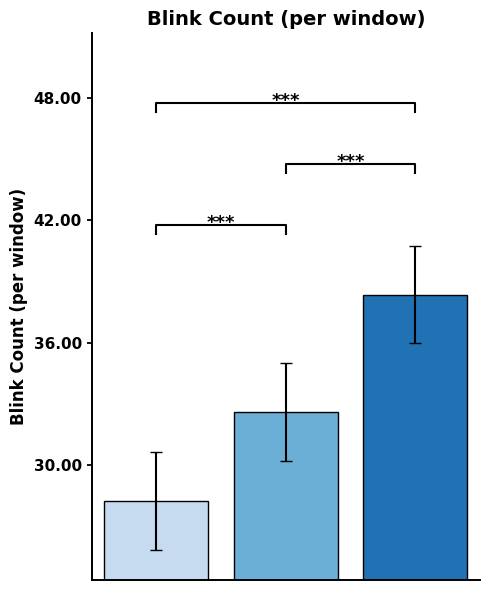


Fixation Count (per window)
Means for fix_count:
  H: 79.060
  L: 81.377
  M: 79.723

=== Fixation Count (per window) (R lmerTest) ===
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dv ~ condition + session_order_numeric + window_index + (1 |  
    participant_id)
   Data: dat

REML criterion at convergence: 12746.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7905 -0.6091  0.0056  0.6258  4.6464 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_id (Intercept) 241.5    15.54   
 Residual                   116.5    10.79   
Number of obs: 1657, groups:  participant_id, 38

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)             72.43990    8.95246   36.17552   8.092 1.24e-09 ***
condition.L             -1.78753    0.46208 1616.44669  -3.868 0.000114 ***
condition.Q              0.74800    0.45990 1616.30229   1.626 0.104049    
session

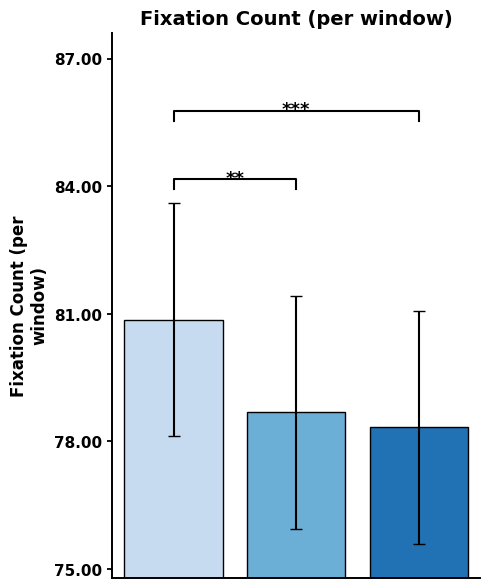


Saccade Count (per window)
Means for sac_count:
  H: 3007.550
  L: 2954.319
  M: 2960.460

=== Saccade Count (per window) (R lmerTest) ===
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dv ~ condition + session_order_numeric + window_index + (1 |  
    participant_id)
   Data: dat

REML criterion at convergence: 23890.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5264 -0.5906 -0.0621  0.5407  4.5755 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_id (Intercept) 354586   595.5   
 Residual                    97848   312.8   
Number of obs: 1657, groups:  participant_id, 38

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           2726.386    342.028   36.084   7.971 1.80e-09 ***
condition.L             62.638     13.394 1616.241   4.676 3.16e-06 ***
condition.Q            -12.843     13.331 1616.158  -0.963    0.335    
session_order_numer

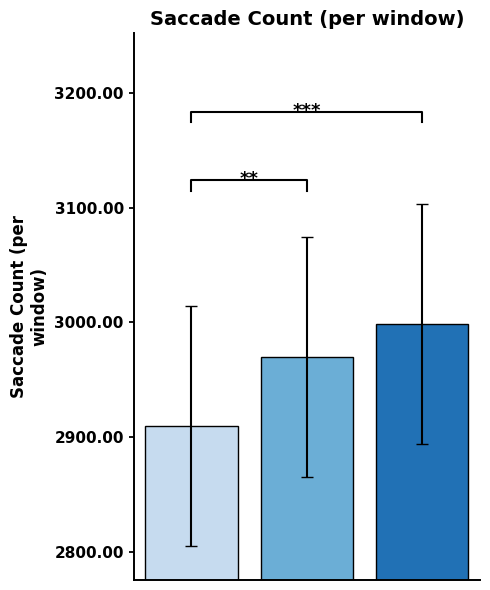


Blink Rate (per second)
Means for blink_rate:
  H: 0.633
  L: 0.457
  M: 0.531

=== Blink Rate (per second) (R lmerTest) ===
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dv ~ condition + session_order_numeric + window_index + (1 |  
    participant_id)
   Data: dat

REML criterion at convergence: 939.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2961 -0.4924 -0.1101  0.3252 15.0646 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_id (Intercept) 0.04668  0.2161  
 Residual                   0.09453  0.3075  
Number of obs: 1657, groups:  participant_id, 38

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            5.932e-01  1.271e-01  3.668e+01   4.668 3.98e-05 ***
condition.L            1.190e-01  1.316e-02  1.618e+03   9.041  < 2e-16 ***
condition.Q            9.551e-03  1.310e-02  1.617e+03   0.729   0.4661    
session_order_numer

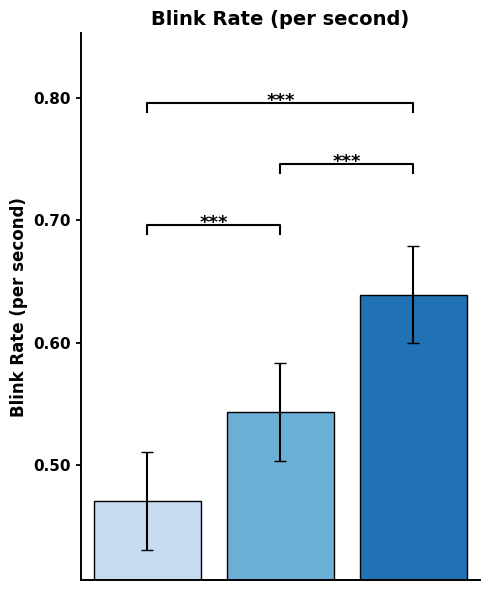


Fixation Rate (per second)
Means for fix_rate:
  H: 1.318
  L: 1.356
  M: 1.329

=== Fixation Rate (per second) (R lmerTest) ===
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dv ~ condition + session_order_numeric + window_index + (1 |  
    participant_id)
   Data: dat

REML criterion at convergence: -781.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7905 -0.6091  0.0057  0.6259  4.6465 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_id (Intercept) 0.06710  0.2590  
 Residual                   0.03235  0.1799  
Number of obs: 1657, groups:  participant_id, 38

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.207e+00  1.492e-01  3.618e+01   8.092 1.24e-09 ***
condition.L           -2.979e-02  7.702e-03  1.616e+03  -3.868 0.000114 ***
condition.Q            1.247e-02  7.665e-03  1.616e+03   1.626 0.104052    
session_order_

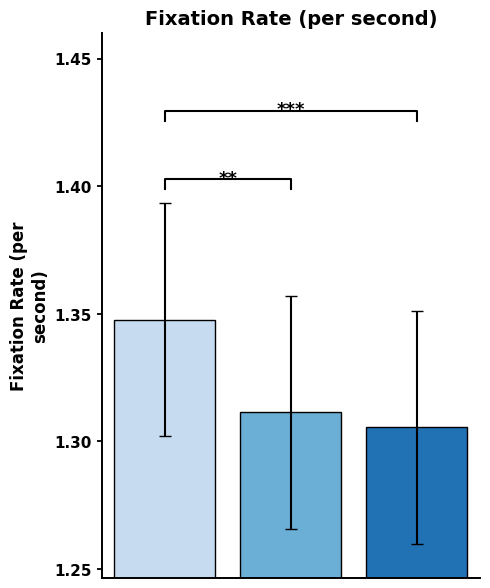


Saccade Rate (per second)
Means for sac_rate:
  H: 50.127
  L: 49.239
  M: 49.342

=== Saccade Rate (per second) (R lmerTest) ===
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dv ~ condition + session_order_numeric + window_index + (1 |  
    participant_id)
   Data: dat

REML criterion at convergence: 10362.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5264 -0.5906 -0.0623  0.5407  4.5756 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_id (Intercept) 98.50    9.925   
 Residual                   27.18    5.214   
Number of obs: 1657, groups:  participant_id, 38

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)             45.44047    5.70057   36.08390   7.971 1.80e-09 ***
condition.L              1.04398    0.22324 1616.24132   4.676 3.16e-06 ***
condition.Q             -0.21406    0.22219 1616.15763  -0.963    0.335    
session_orde

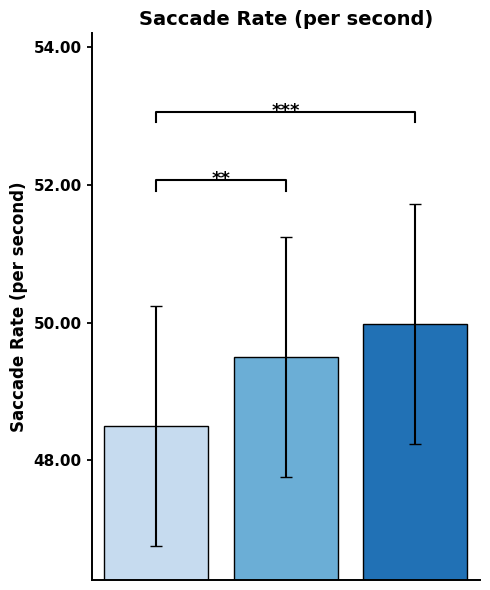


Mean Velocity (deg/sec)
Means for mean_vel:
  H: 1.629
  L: 1.492
  M: 1.586

=== Mean Velocity (deg/sec) (R lmerTest) ===
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dv ~ condition + session_order_numeric + window_index + (1 |  
    participant_id)
   Data: dat

REML criterion at convergence: 216.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7286 -0.5176 -0.0953  0.3609  7.7905 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_id (Intercept) 0.10221  0.3197  
 Residual                   0.05943  0.2438  
Number of obs: 1657, groups:  participant_id, 38

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.666e+00  1.844e-01  3.620e+01   9.033 8.32e-11 ***
condition.L            1.001e-01  1.044e-02  1.617e+03   9.586  < 2e-16 ***
condition.Q           -2.929e-02  1.039e-02  1.616e+03  -2.819  0.00488 ** 
session_order_numeric

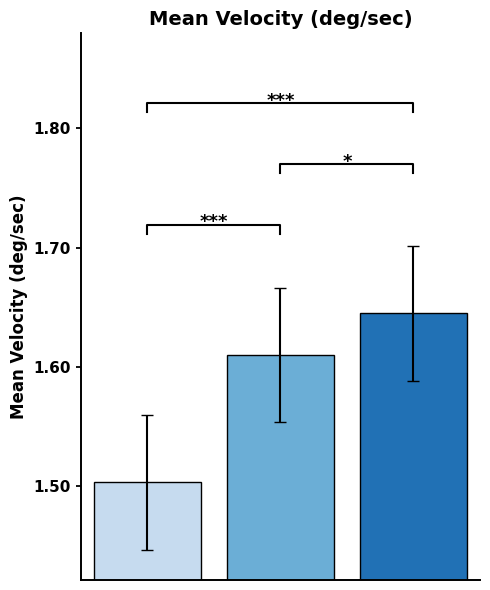


RMS Dispersion (deg)
Means for rms_disp:
  H: 0.327
  L: 0.322
  M: 0.325

=== RMS Dispersion (deg) (R lmerTest) ===
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dv ~ condition + session_order_numeric + window_index + (1 |  
    participant_id)
   Data: dat

REML criterion at convergence: -8855.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1251 -0.5956  0.0112  0.6470  3.2538 

Random effects:
 Groups         Name        Variance  Std.Dev.
 participant_id (Intercept) 0.0001137 0.01066 
 Residual                   0.0002520 0.01588 
Number of obs: 1657, groups:  participant_id, 38

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            3.368e-01  6.288e-03  3.667e+01  53.564  < 2e-16 ***
condition.L            3.149e-03  6.796e-04  1.618e+03   4.633 3.89e-06 ***
condition.Q            8.106e-06  6.764e-04  1.617e+03   0.012    0.990    
session_order_numeric 

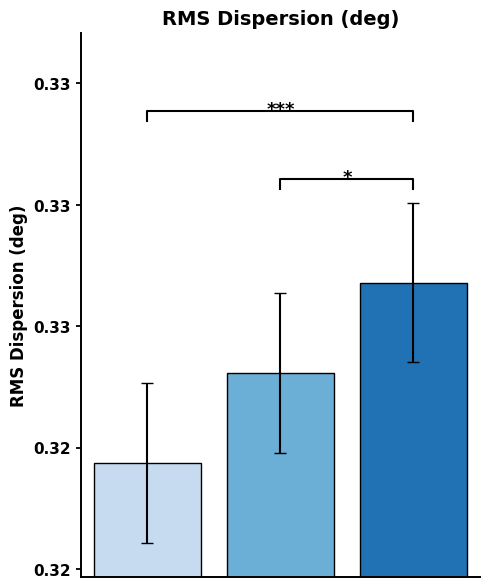


✓ Statistical analysis complete!


In [28]:
# Run statistical analysis for key metrics
for metric, label in metrics:
    print(f"\n{'='*60}")
    print(f"{label}")
    print(f"{'='*60}")
    
    # Run mixed effects model and get stats
    pairwise_p, means, cis = run_rpy2_lmer(
        all_metrics_df, metric, label
    )
    
    # Prepare data for plotting
    conds = ["L", "M", "H"]
    mean_vals = [means.get(c, float('nan')) for c in conds]
    sems = [(cis[c][1] - cis[c][0]) / 3.92 if c in cis else float('nan') for c in conds]  # 95% CI to SEM
    pvals = [
        pairwise_p.get(("L", "M"), 1.0), 
        pairwise_p.get(("L", "H"), 1.0), 
        pairwise_p.get(("M", "H"), 1.0)
    ]
    
    # Create plot
    fig, ax = plt.subplots(figsize=(5, 6))
    barplot_ax(ax, mean_vals, sems, pvals, ylabel=label, metric_name=metric)
    ax.set_title(label, fontsize=14, weight='bold')
    plt.tight_layout()
    plt.show()

print("\n✓ Statistical analysis complete!")